# House price predication problem

# We'll approch this problem in following sequence.
<ul>
<li>EDA</li>
<li>Data preprocessing</li>
<li>Modeling</li>
</ul>

Before digging into the problem we first need to understand what kind of features we have to gauge the price of the house, for that we'll extensively use data dictionary. We will try to understand what kind of categorical features we have and what kind of numerical features we have. Then we'll try to find those features which are important for our analysis (features which actually affect the price of the house).

Let's start with data dictionary and try to find categorical and numerical features. Before that we'll cluster the similar kind of features

# Clustering of similar kind of features
<ul>
    <li>
        <b>Building related</b>
        <ul>
            <li>MSZoning - Categorical</li>
            <li>MSSubClass - Categorical</li>
            <li>Street - Categorical</li>
            <li>Alley - Categorical</li>
            <li>LotShape - Categorical</li>
            <li>LandContour - Categorical</li>
            <li>LandSlope - Categorical</li>
            <li>Utilities - Categorical</li>
            <li>LotConfig - Categorical</li>
            <li>Neighborhood - Categorical</li>
            <li>Condition1 - Categorical</li>
            <li>Condition2 - Categorical</li>
            <li>BldgType - Categorical</li>
            <li>Fireplaces - Categorical</li>
            <li>FireplaceQu - Categorical</li>
            <li>PavedDrive - Categorical</li>
            <li>LotFrontage - Continuous</li>
        </ul>
    </li>
    <li><b>House related</b></li>
        <ul>
            <li>HouseStyle - Categorical</li>
            <li>OverallQual - Categorical</li>
            <li>OverallCond - Categorical</li>
            <li>YearBuilt - Date</li>
            <li>YearRemodAdd - Date</li>
            <li>RoofStyle - Categorical</li>
            <li>RoofMatl - Categorical</li>
            <li>Exterior1st - Categorical</li>
            <li>Exterior2nd - Categorical</li>
            <li>ExterQual - Categorical</li>
            <li>ExterCond - Categorical</li>
            <li>MasVnrType - Categorical</li>
            <li>Foundation - Categorical</li>
            <li>BsmtQual - Categorical</li>
            <li>BsmtCond - Categorical</li>
            <li>BsmtExposure - Categorical</li>
            <li>BsmtFinType1 - Categorical</li>
            <li>BsmtFinType2 - Categorical</li>
            <li>Heating - Categorical</li>
            <li>HeatingQC - Categorical</li>
            <li>CentralAir - Categorical</li>
            <li>Electrical - Categorical</li>
            <li>KitchenQual - Categorical</li>
            <li>Functional - Categorical</li>
            <li>GarageType - Categorical</li>
            <li>GarageYrBlt - Date</li>
            <li>GarageFinish - Categorical</li>
            <li>GarageQual - Categorical</li>
            <li>GarageCond - Categorical</li>
            <li>Fence - Categorical</li>
            <li>MiscFeature - Categorical</li>
            <li>SaleType - Categorical</li>
            <li>SaleCondition - Categorical</li>
            <li>GarageCars - Continuous</li>
            <li>GarageArea - Continuous</li>
            <li>PoolQC - Continuous</li>
            <li>LotArea - Continuous</li>
            <li>MasVnrArea - Continuous</li>
            <li>BsmtFinSF1 - Continuous</li>
            <li>BsmtFinSF2 - Continuous</li>
            <li>BsmtFinSF2 - Continuous</li>
            <li>BsmtUnfSF - Continuous</li>
            <li>TotalBsmtSF - Continuous</li>
            <li>1stFlrSF - Continuous</li>
            <li>2ndFlrSF - Continuous</li>
            <li>LowQualFinSF - Continuous</li>
            <li>GrLivArea  - Continuous</li>
            <li>BsmtFullBath - Continuous</li>
            <li>BsmtHalfBath - Continuous</li>
            <li>FullBath - Continuous</li> 
            <li>HalfBath - Continuous</li>     
            <li>BedroomAbvGr - Continuous</li>
            <li>Kitchen - Continuous</li>
            <li>TotRmsAbvGrd - Continuous</li>
            <li>PoolArea - Continuous</li>
            <li>MiscVal - Continuous</li>
            <li>MoSold - Continuous</li>
        </ul>
</ul>


## Observations

<b> Some of the important features as per our understanding- </b><br>
    1) Age of the house ( derived )<br>
    2) OverallQual<br>
    3) GrLivArea <Br>
    4) Total area ( derived )<br>
    5) BedroomAbvGr etc...

# EDA

## Understanding the data at hand

In [1629]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
import numpy as np
import os
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [1630]:
#fetch data
housing = pd.read_csv("train.csv")

In [1631]:
#get info of columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1632]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<b><font color='red'>[Observation] - </font></b> We can see that some of the categorical features have int as datatype. like OverallQual, OverallCond etc. We will change the features data types.

'MSSubClass','OverallQual','OverallCond','MoSold' columns are categorical features. Where MSSubClass is <b> Unordered categorical variable </b> while 'OverallQual','OverallCond' are ordered categorical variable. MoSold column has data about in which month house is sold, so we will consider it as categorical variable.

So we'll convert dtype of MSSublcass and will keep 'OverallQual','OverallCond' as it's.

There are ordinal categorical features like FireplaceQu, BsmtCond etc. present in dataframe we'll replace the object value with numerical sequence after treating null values.

In [1633]:
housing[['MSSubClass','MoSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1460 non-null   int64
 1   MoSold      1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [1634]:
#Let's convert them into appropriate format
housing[['MSSubClass','MoSold']] = housing[['MSSubClass','MoSold']].astype('object')

In [1635]:
housing[['MSSubClass','MoSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSSubClass  1460 non-null   object
 1   MoSold      1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


### Data cleaning and null value imputing

In [1636]:
#let's find the shpae of the training data
housing.shape

(1460, 81)

In [1637]:
housing.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


Let's see whether null values are present in the dataset or not and if any then will either compute them or delete them

In [1638]:
round((housing.isnull().sum()[housing.isnull().sum() > 0]/housing.shape[0]) * 100,2) #percentage of null values per column

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

<b><font color='red'>[Observation] - </font></b> We will drop PoolQC, Fence, MiscFeature, Alley as these columns have most of the null data. We can replace these null values with their respective No_pool, No_Alley but as most of the data consists of no value these columns have no significance.

In [1639]:
housing.drop(columns=['PoolQC','Fence','MiscFeature','Alley'],inplace=True)

In [1640]:
#we will replace missing value in FireplaceQu with NA as null values represent no fireplace nearby, this we can verify by counting value count of number of fireplaces nearby
housing['FireplaceQu'] = housing.FireplaceQu.fillna('NA')

In [1641]:
#we'll drop Id as it's not important
#we'll drop poolArea as well as it's of no use when poolQS is dropped
housing.drop(columns=['Id','PoolArea'],inplace=True)

In [1642]:
#In case of lot frontage we have to impute values by using median or mean values. But we can't take mean or median of
#all values as different locality can have different lotFrontage so we'll compute median/mean of neighbours and will replace
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [1643]:
#we can see that if there is no garage then other information about garage is not present
housing[['GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt']][housing.GarageType.isnull()]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [1644]:
#we'll fill null values with No garage 
housing[['GarageType','GarageFinish','GarageQual','GarageCond']] = housing[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('No Garage')
#first we will fill all na values with 0 then we'll replace them with year sold as it'll help us while finding the age of the house
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].replace(0,housing.YrSold)

In [1645]:
round((housing.isnull().sum()[housing.isnull().sum() > 0]/housing.shape[0]) * 100,2) #percentage of null values per column

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
dtype: float64

In [1646]:
round((housing.isnull().sum()[housing.isnull().sum() > 0]/housing.shape[0]) * 100,2)

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
dtype: float64

In [1647]:
# will replace null values in MasVnrType with none
housing[['MasVnrType']] = housing[['MasVnrType']].fillna('None')
housing[['MasVnrArea']] = housing[['MasVnrArea']].fillna(0)

In [1648]:
# houses which doesn't have basements won't have other properties related to basement
housing[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']][housing.BsmtQual.isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [1649]:
housing[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = housing[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No basement')

In [1650]:
#we will remove data which doesn't have electrical information
housing = housing[~housing.Electrical.isnull()]

In [1651]:
round((housing.isnull().sum()[housing.isnull().sum() > 0]/housing.shape[0]) * 100,2)

Series([], dtype: float64)

<b><font color='red'>[Observation] - </font></b> Now we've data which doesn't have any null values 

<b> As discussed earlier we'll replace object values with numeric for ordinal categorical features

By doing this we will greatly reduce number of categorical variable their in our final model 

In [1652]:
housing = housing.replace(
                       {"BsmtCond":     {"No basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},

                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

In [1653]:
#creating numerical feature dataframe
housing_num = housing.select_dtypes(include=['int','float','int64','float64'])

In [1654]:
#creating categorical feature dataframe
housing_cat = housing.select_dtypes(include=['object'])

In [1655]:
print(housing_num.shape)
print(housing_cat.shape)
print(housing.shape)

(1459, 54)
(1459, 21)
(1459, 75)


## Univariate analysis

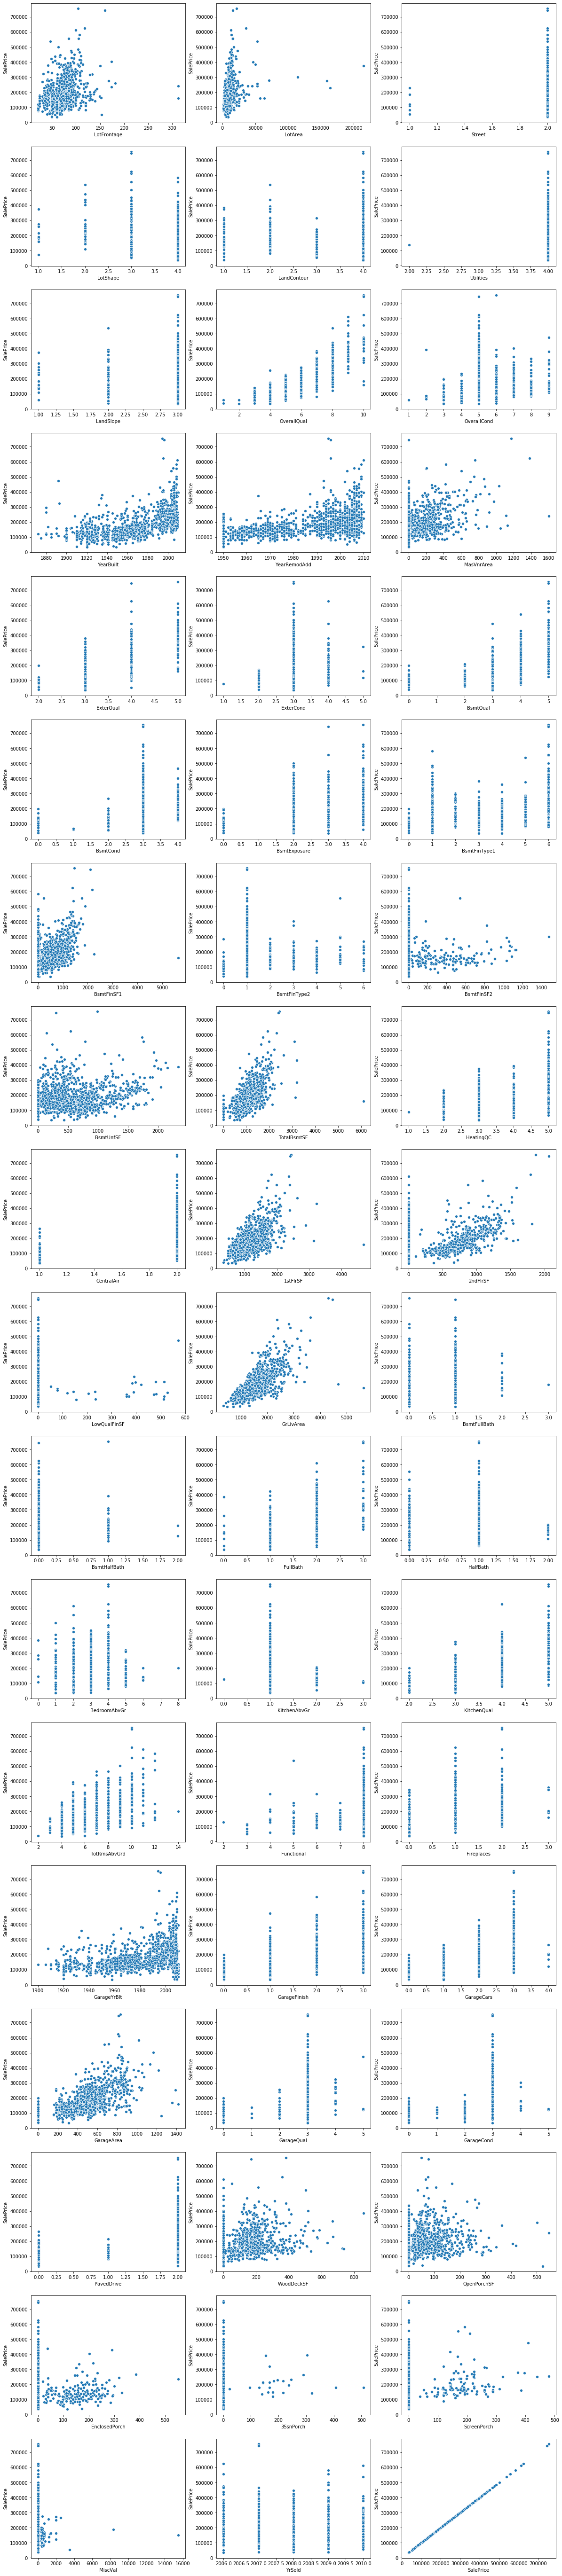

In [1656]:
plt.figure(figsize=(20, 100)) 
total_rows = 0
clmns = housing_num.columns
temp = len(clmns)//3
chk = len(clmns)%3
if chk == 0:
    total_rows = temp
else:
    total_rows = temp + 1
j = 1
for i in clmns:
    plt.subplot(total_rows,3,j)
    sns.scatterplot(x = i, y = 'SalePrice', data = housing)
    j += 1


<b><font color='red'>[Observation] - </font></b> <br>
    1) GrLivArea,1stFlfSF,TotalBsmt are highly correlated with SalePrice <br>
    2) Street, Utilities, CentralAir, LowQualFinSF, 3SsnPorch , MiscVal, KitchenAbvGr may have problem of class imbalance. <br>
    3) We can see that there are some outliers present in GrLivArea, 1stFirSF etc. we'll remove them letter
    

In [1657]:
#Let's look into class imbalance
display(housing.Street.value_counts())
display(housing.Utilities.value_counts())
display(housing.CentralAir.value_counts())
display(housing.LowQualFinSF.value_counts())
display(housing['3SsnPorch'].value_counts())
display(housing.MiscVal.value_counts())
display(housing.KitchenAbvGr.value_counts())
display(housing.LandSlope.value_counts())

2    1453
1       6
Name: Street, dtype: int64

4    1458
2       1
Name: Utilities, dtype: int64

2    1364
1      95
Name: CentralAir, dtype: int64

0      1433
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

0      1435
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

0        1407
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

1    1391
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

3    1381
2      65
1      13
Name: LandSlope, dtype: int64

In [1658]:
#we can clearly see that above attributes have class imbalance problem, we'll drop them
housing.drop(columns=['Street','Utilities','CentralAir','LowQualFinSF','3SsnPorch','MiscVal','KitchenAbvGr','LandSlope'],inplace=True)

In [1659]:
#housing = housing[~(housing['1stFlrSF']>4000)]
#housing = housing[~(housing['SalePrice'] == 184750)]

## Categorical variable analysis

In [1660]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1):
    plt.figure(figsize=(20, 8))   
    plt.subplot(1,2,1)
    plt.title('Count Plot of '+ var1)
    plt1=sns.countplot(housing[var1], palette=("deep"))
    plt1.set(xlabel = '%s'%var1, ylabel='Count of'+ '%s'%var1)
        
    plt.subplot(1,2,2)
    plt.title(var1+' vs Price')
    plt2=sns.boxplot(x=housing[var1], y=housing.SalePrice, palette=("deep"))     
    plt.show()

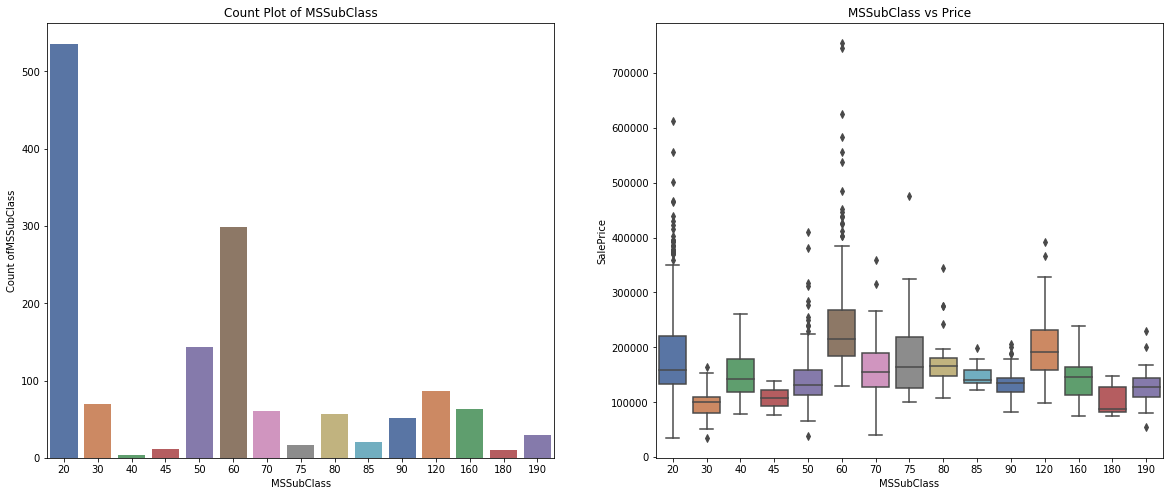

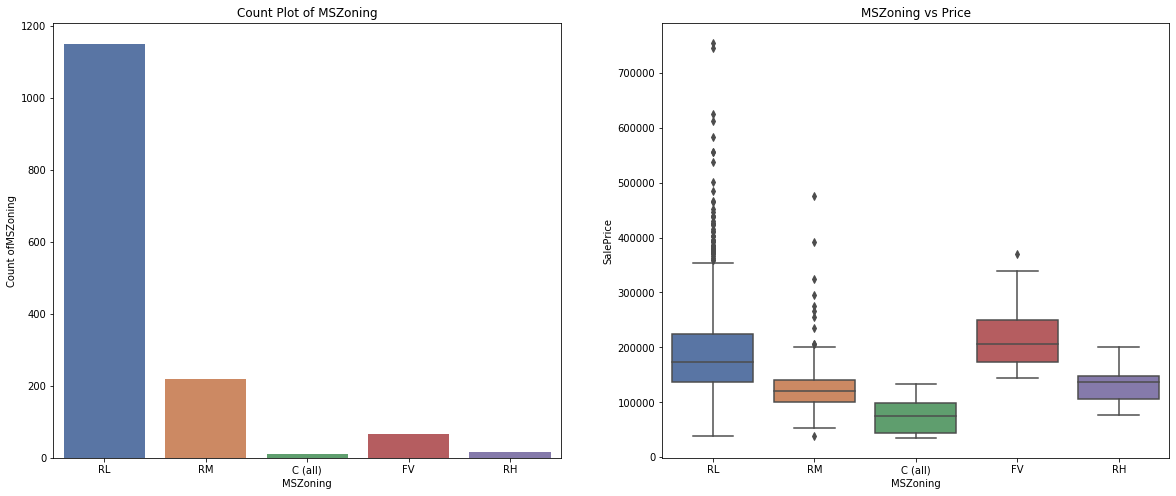

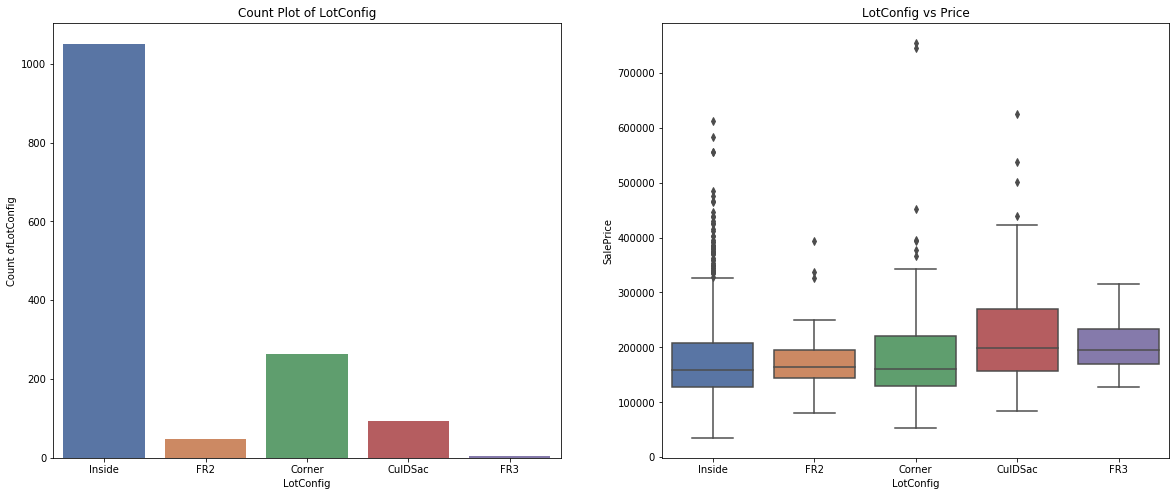

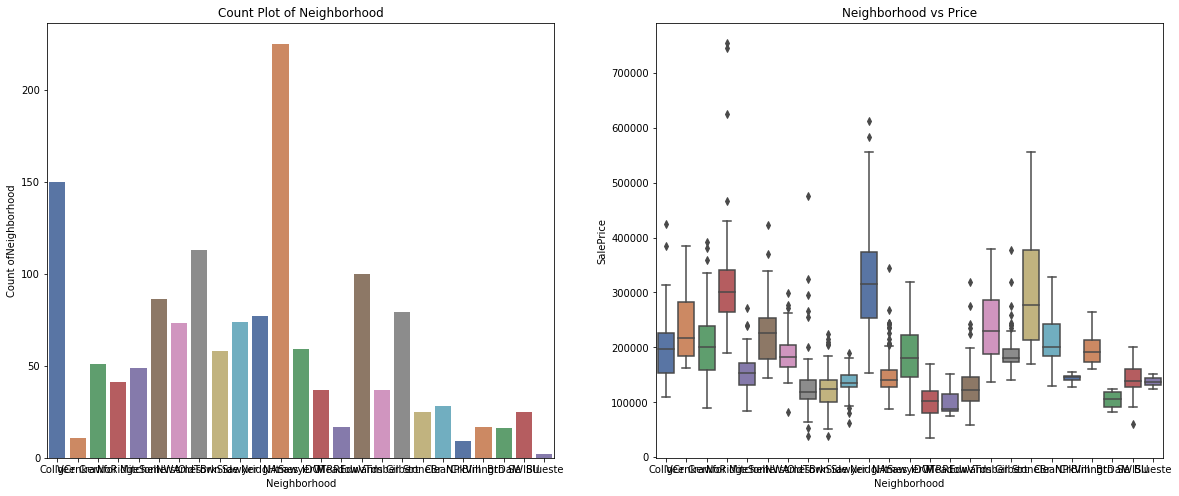

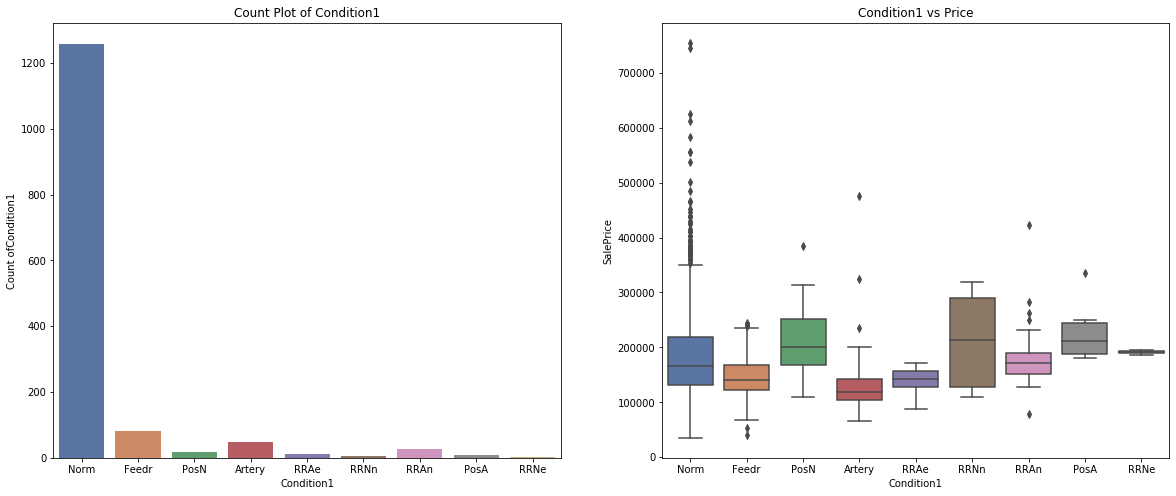

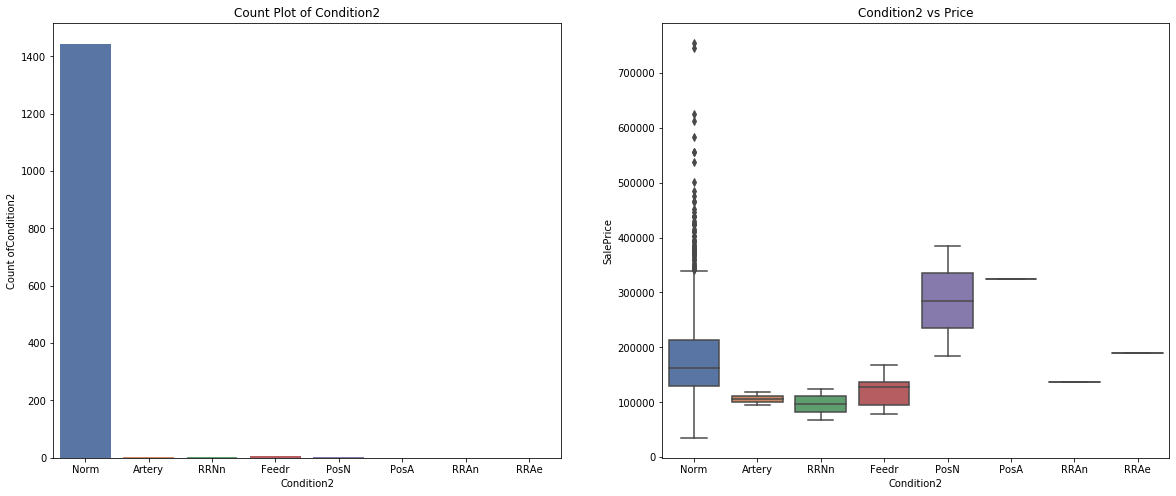

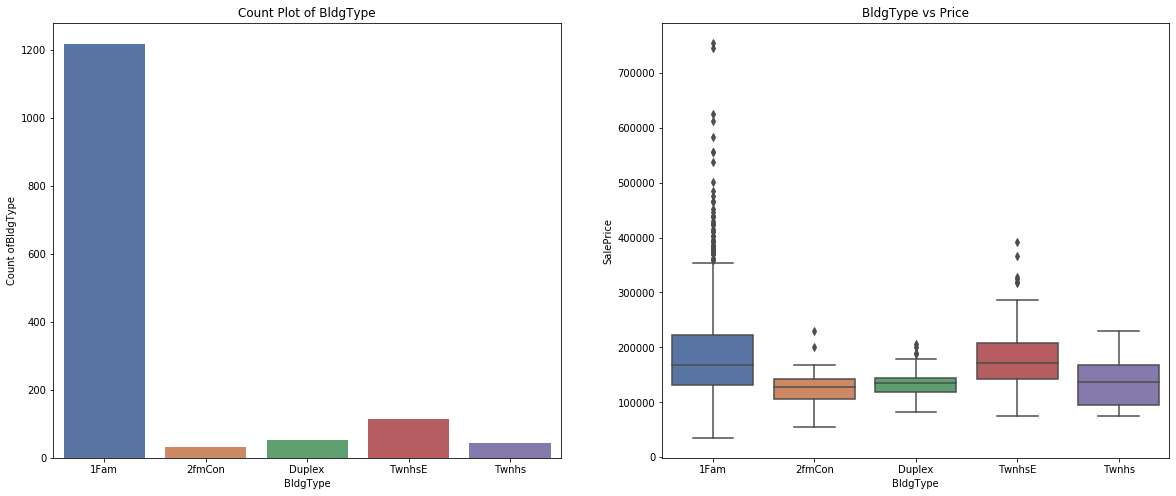

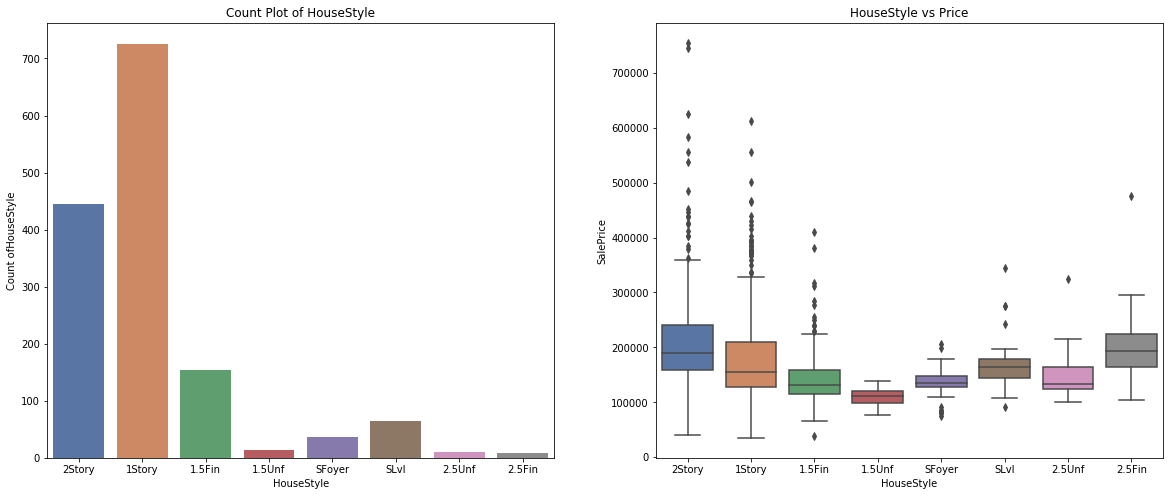

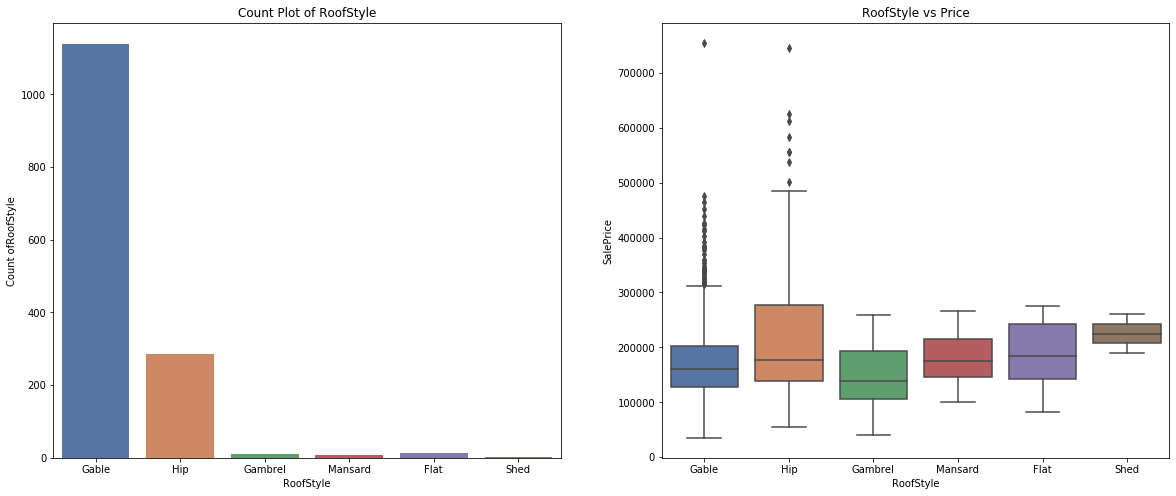

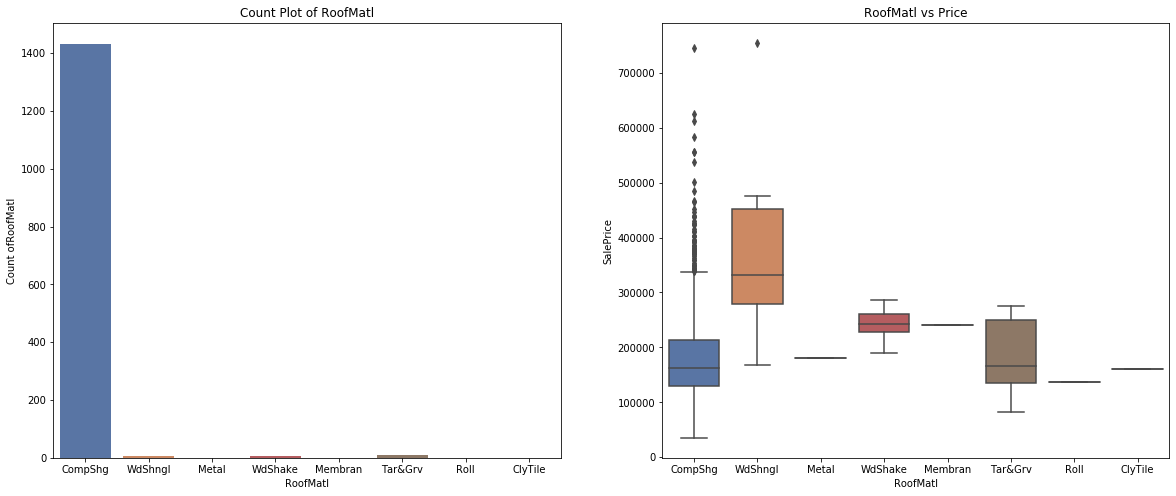

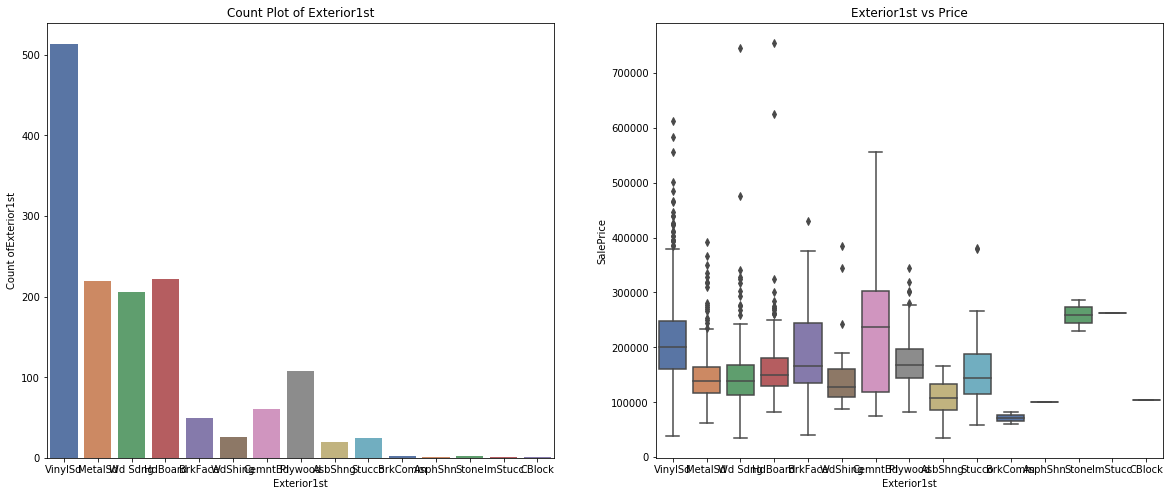

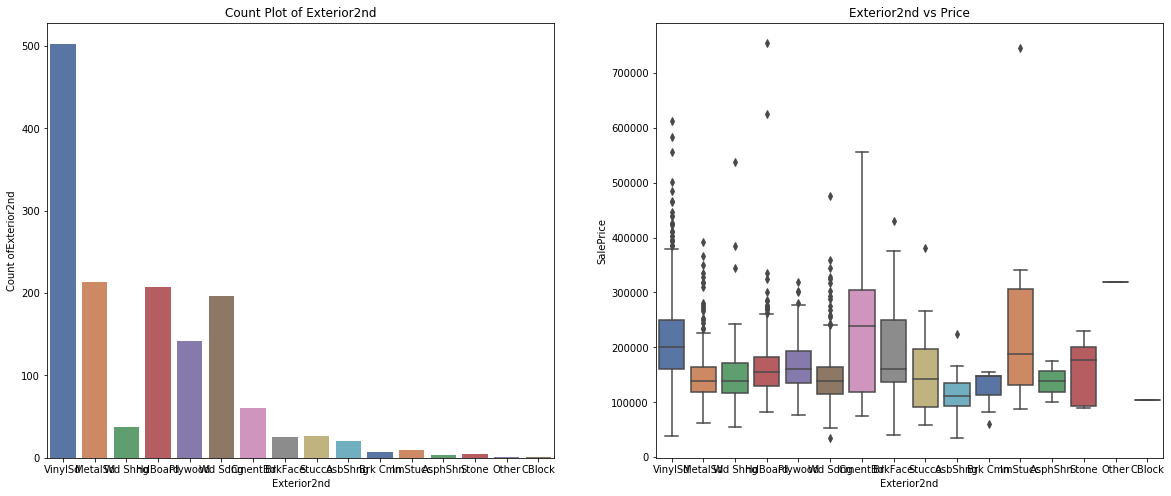

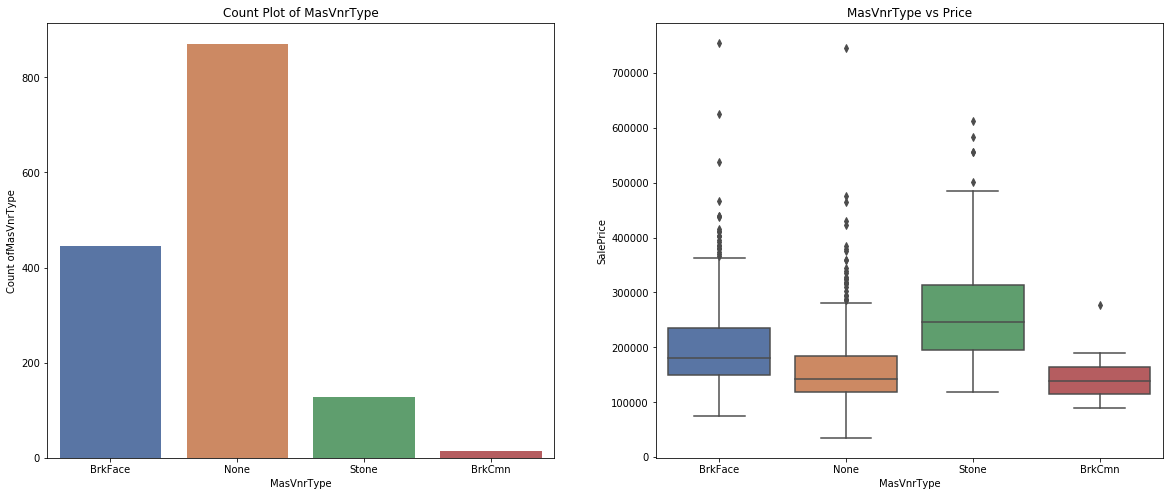

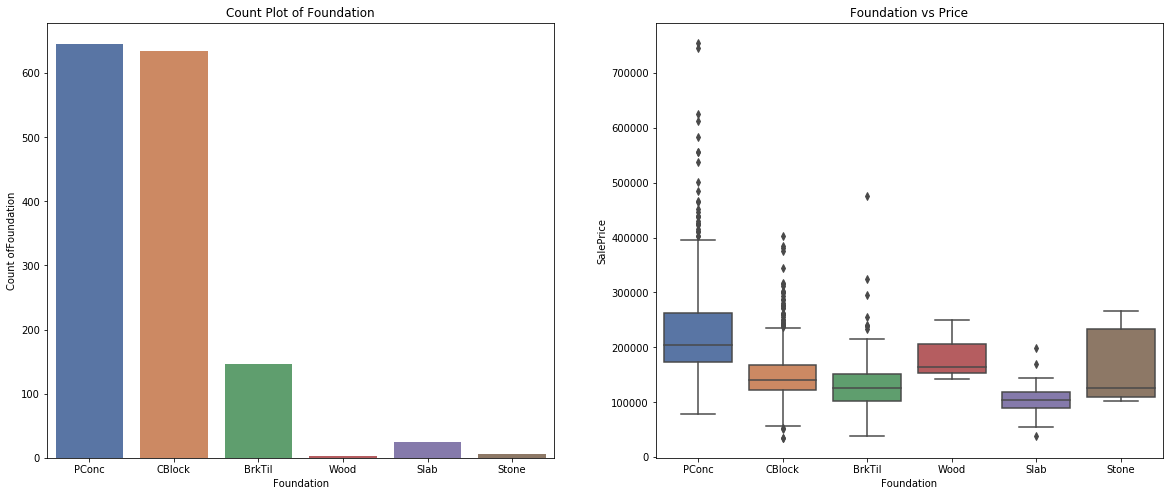

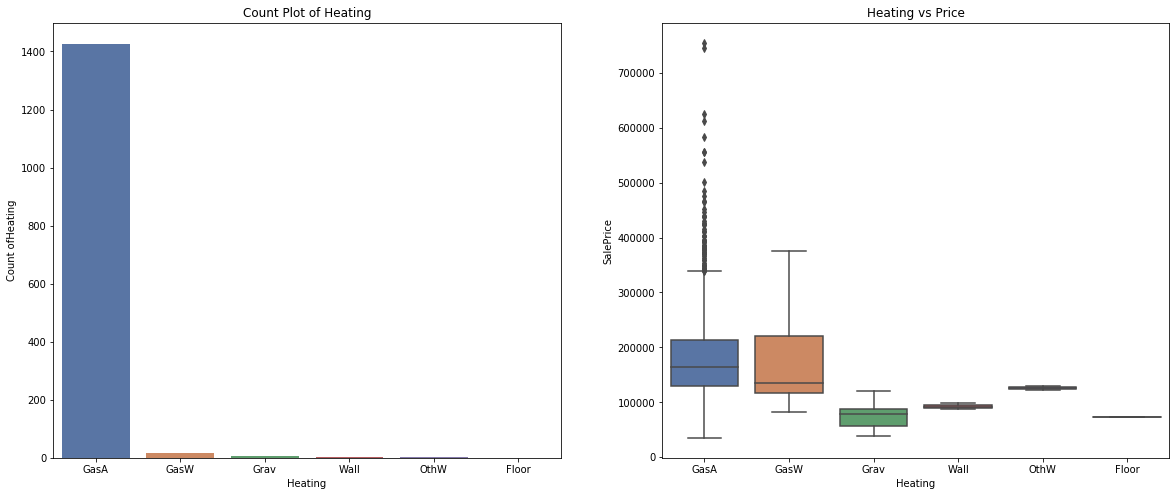

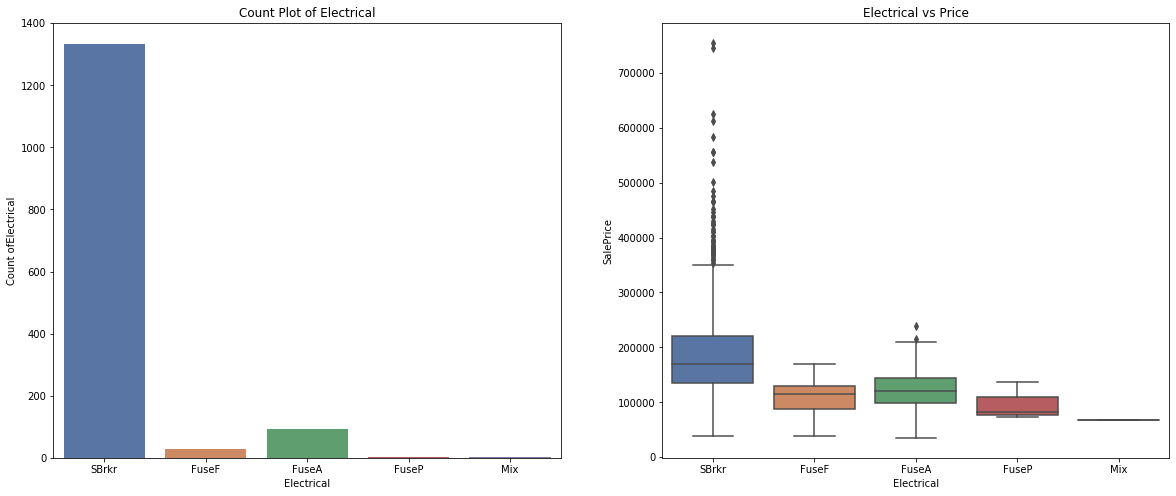

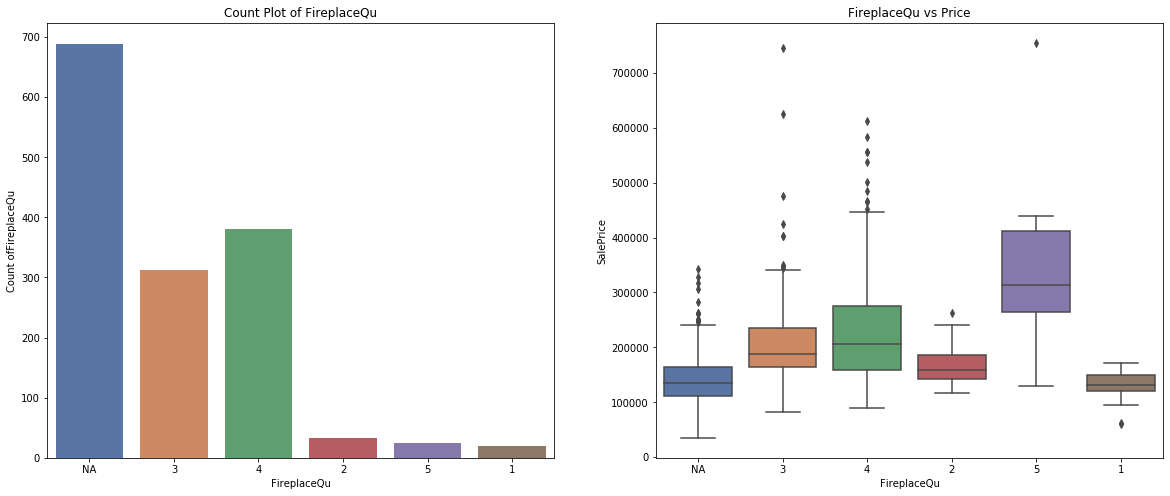

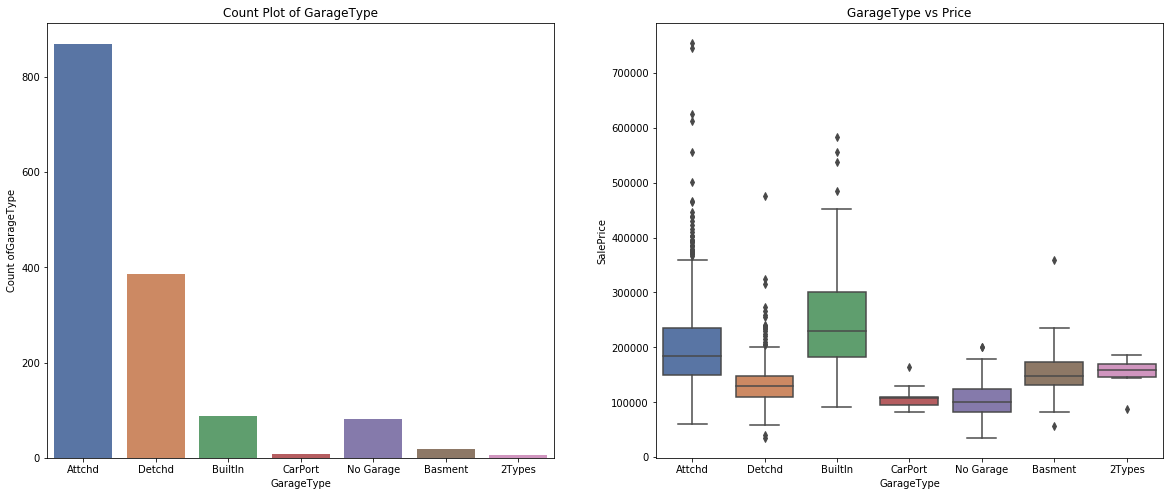

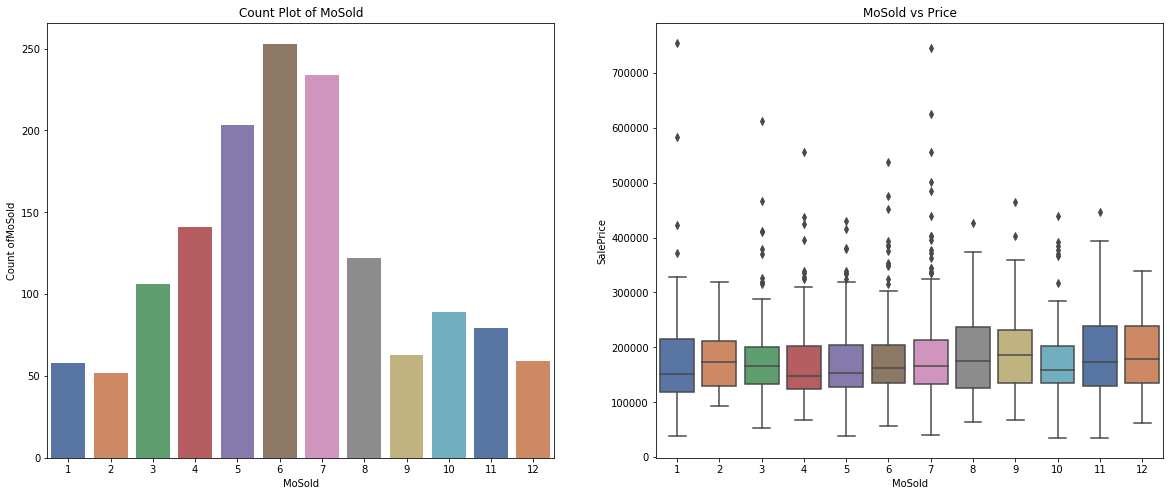

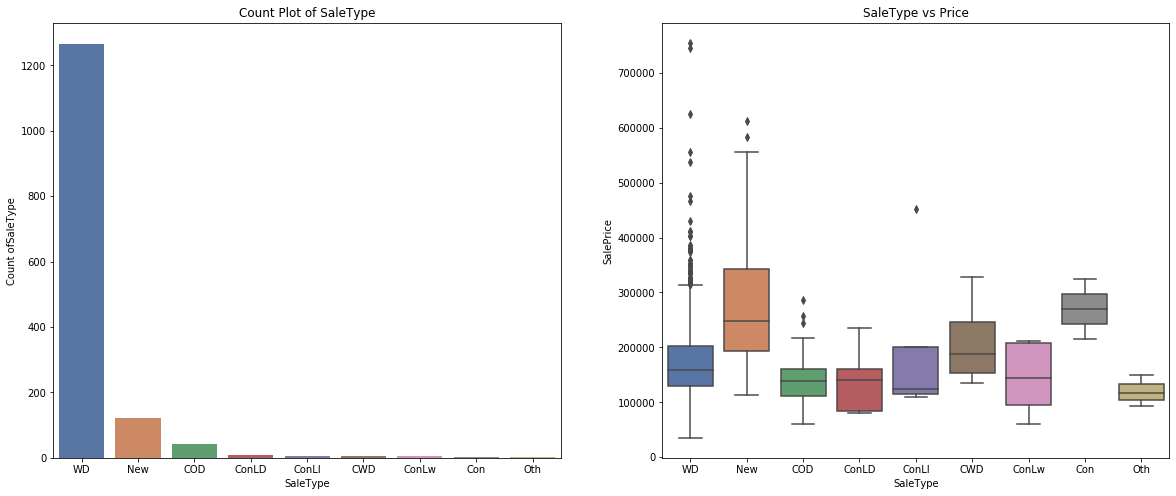

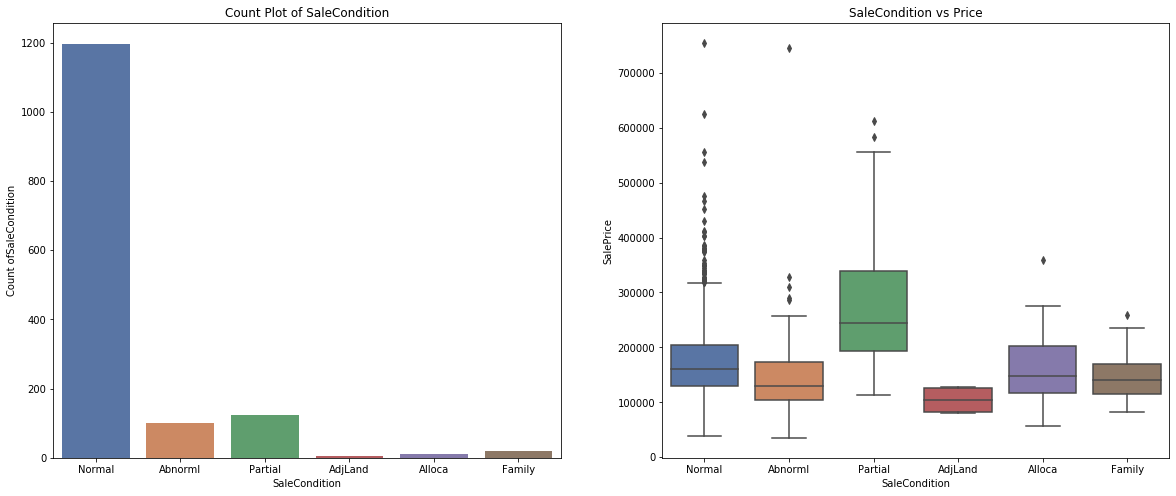

In [1661]:
for i in housing_cat.columns:
    plot_charts(i)

<b><font color='red'>[Observation] - </font></b> <br>
    1) MSSubClass 1-STORY 1946 & NEWER ALL STYLES has highest number of homes in subclass category.<br>
    2) North Ames neighborhood has highest number of houses from given dataset.<br>
    3) Northridge Heights, Northridge and Stone Brook attracts costlier homes.<br>
    4) 2 story and 2.5 story houses attracts greater price.<br>
    5) Contrete	foundation houses are costlier.<br>
    6) As number of fireplaces increases price of the house increases.<br>
    7) Most of the houses are sold in May, June and July.<br>

### Feature engineering

After looking at the data dictionary we can derive following features.

1) TotalArea = 1stFlrSF + 2ndFlrSF + GrLivArea<br>
2) Age of the house<br>
3) Ager of garage
 

In [1662]:
housing['TotalArea'] = housing['1stFlrSF'] + housing['2ndFlrSF'] + housing['GrLivArea']

In [1663]:
housing['Age_of_house'] =housing['YrSold']  - housing['YearBuilt']

In [1664]:
housing['Age_of_Garage'] =housing['YrSold']  - housing['GarageYrBlt'] 

In [1665]:
housing.drop(columns=['1stFlrSF','2ndFlrSF','GrLivArea','YearBuilt','YrSold','GarageYrBlt'],inplace=True)

In [1666]:
#creating diff dataframes for diff datatypes
housing_num = housing.select_dtypes(include=['int','float','int64','float64'])
housing_cat = housing.select_dtypes(include=['object'])

### We still have to remove outliers, in order to remove outliers we will use interquantile range method. where we'll keep range of 5% to 95% 

In [1667]:
def rm_outl(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

numeric_data_list=list(housing_num.columns)

housing=rm_outl(housing,numeric_data_list)
#reseting the index
housing = housing.reset_index(drop=True)

Let's see how scatter plot looks like after removing outliers.

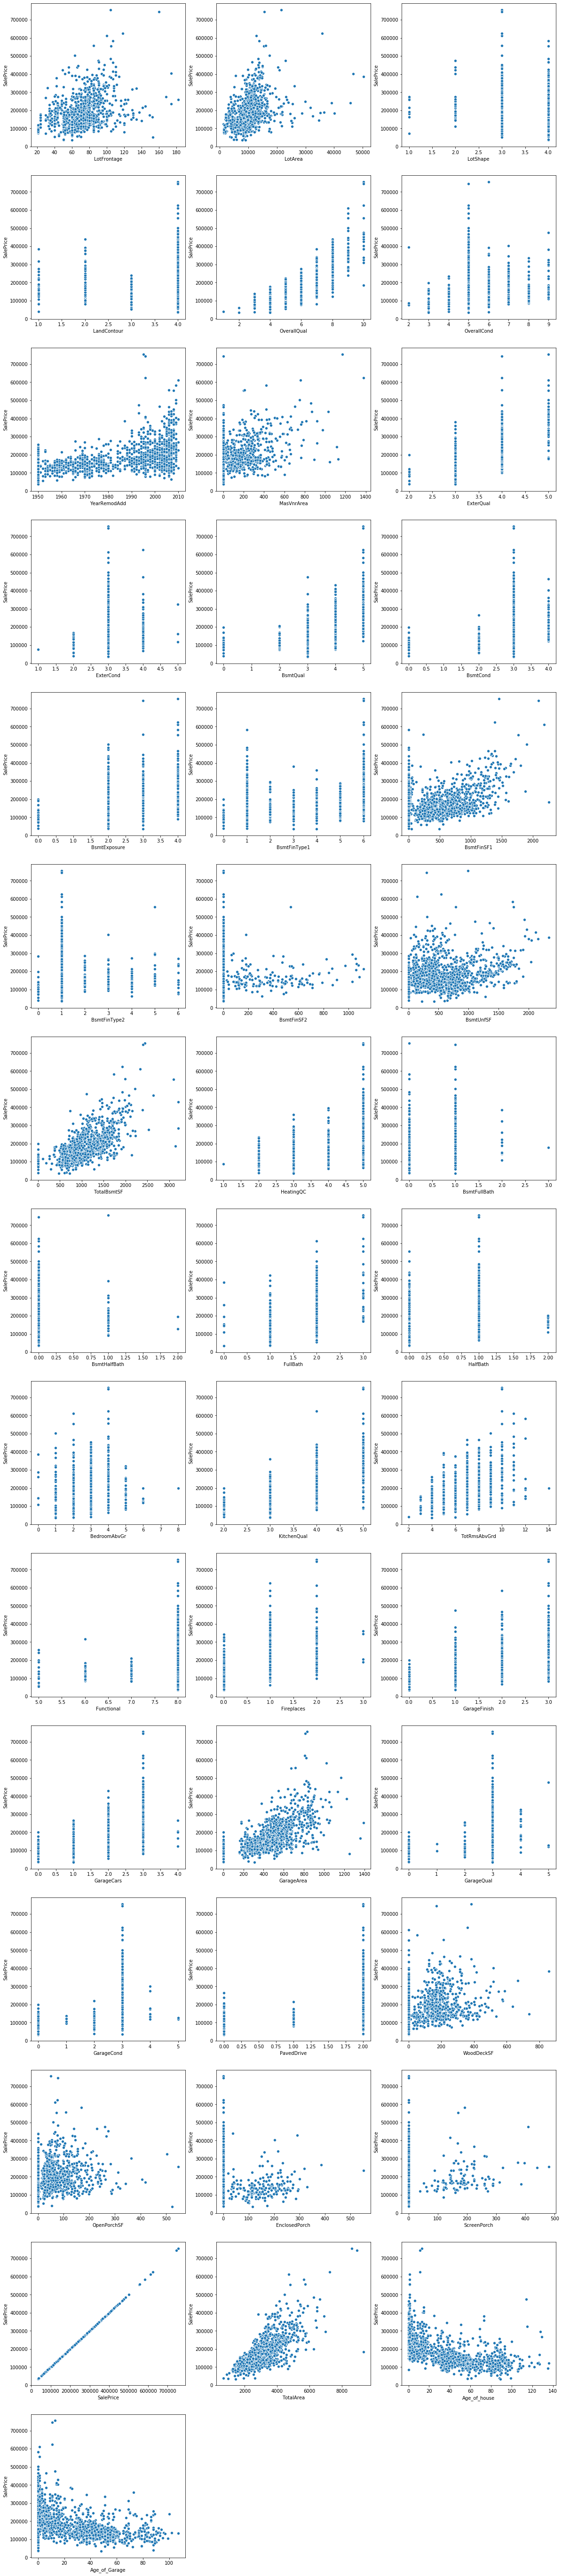

In [1668]:
plt.figure(figsize=(20, 100)) 
total_rows = 0
clmns = housing_num.columns
temp = len(clmns)//3
chk = len(clmns)%3
if chk == 0:
    total_rows = temp
else:
    total_rows = temp + 1
j = 1
for i in clmns:
    plt.subplot(total_rows,3,j)
    sns.scatterplot(x = i, y = 'SalePrice', data = housing)
    j += 1


In [1669]:
# we still have one outlier in TotalArea, we'll remove that as well
housing = housing[~(housing.TotalArea>9350)]
housing.reset_index(inplace=True)

In [1670]:
#housing['SalePrice'] = np.log(housing['SalePrice'])

In [1671]:
housing_num = housing.select_dtypes(include=['int','float','int64','float64'])
housing_cat = housing.select_dtypes(include=['object'])

## Let's try to find out which numeric variables are highly correlated with target variable

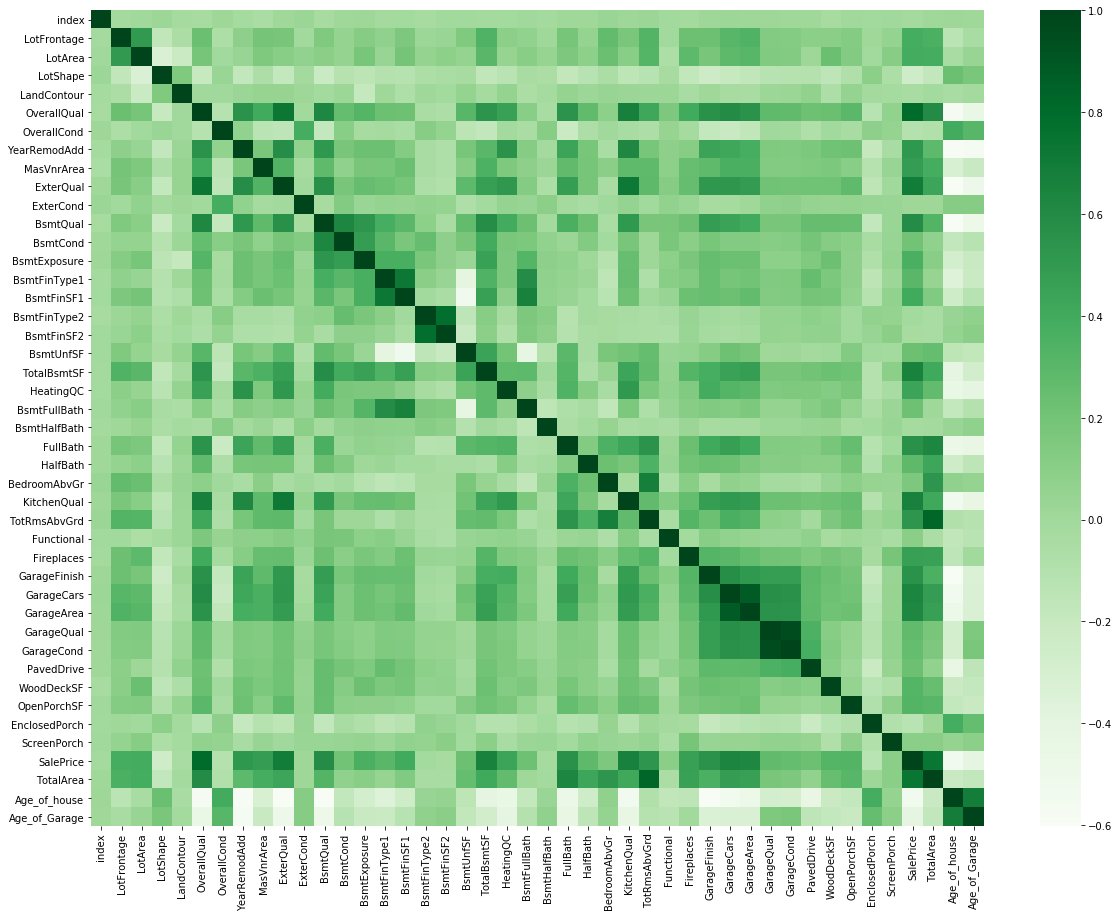

In [1672]:
plt.figure(figsize=(20,15))
sns.heatmap(housing.corr(),cmap='Greens')

In [1673]:
housing.corr()['SalePrice'].sort_values(ascending=True)[:-1]


Age_of_house    -0.530727
Age_of_Garage   -0.404159
LotShape        -0.253544
EnclosedPorch   -0.125757
OverallCond     -0.096115
LandContour     -0.039939
BsmtFinSF2      -0.028185
BsmtHalfBath    -0.020120
index           -0.015740
BsmtFinType2    -0.013139
ExterCond        0.011673
ScreenPorch      0.102529
Functional       0.105319
BedroomAbvGr     0.160812
BsmtCond         0.206217
BsmtFullBath     0.220936
PavedDrive       0.225975
BsmtUnfSF        0.227228
GarageCond       0.258151
GarageQual       0.269299
HalfBath         0.286193
BsmtFinType1     0.301942
WoodDeckSF       0.320103
OpenPorchSF      0.325447
BsmtExposure     0.364481
LotFrontage      0.383316
LotArea          0.392025
BsmtFinSF1       0.401439
HeatingQC        0.437911
Fireplaces       0.466594
MasVnrArea       0.485662
YearRemodAdd     0.514770
TotRmsAbvGrd     0.536259
GarageFinish     0.551141
FullBath         0.561017
BsmtQual         0.590693
GarageArea       0.630623
GarageCars       0.643234
TotalBsmtSF 

<b><font color='red'>[Observation] - </font></b> <br>
1) Age_of_housing, LotShape are highly negatively correlated with SalePrice <br>
2) OverallQual, TotalArea are highly positively correlated with SalePrice

## Data Preprocessing

we will create dummy variables and will split data into train and test in this section

In [1674]:
#Let's create dummy variables of categorical variables
cat_dummies = pd.get_dummies(housing_cat,drop_first=True)
cat_dummies.reset_index(drop=True)
housing_num.reset_index(drop=True)
housing = pd.concat([housing_num,cat_dummies],axis=1)

In [1675]:
housing.shape

(1425, 207)

In [1676]:
X = housing.copy(deep=True)

In [1677]:
# split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(X, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1678]:
scaler = MinMaxScaler()


y_test = np.log(df_test.pop('SalePrice'))
y_test_reg = y_test.copy(deep=True)
y_train = np.log(df_train.pop('SalePrice'))
y_train_reg = y_train.copy(deep=True)
num_vars = df_train.select_dtypes(include=['int64','float64']).columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()

,index,LotFrontage,LotArea,LotShape,LandContour,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
125,0.087719,0.254902,0.111903,1.000000,1.0,0.500,0.857143,0.533333,0.000000,0.333333,...,0,0,0,0,1,0,0,0,1,0
713,0.501053,0.254902,0.193992,1.000000,1.0,0.625,0.714286,0.333333,0.000000,0.333333,...,0,0,0,0,1,0,0,0,1,0
1283,0.901053,0.261438,0.182271,0.666667,1.0,0.750,0.428571,0.966667,0.239150,0.666667,...,0,0,0,0,1,0,0,0,1,0
147,0.103158,0.274510,0.126606,1.000000,1.0,0.625,0.428571,0.916667,0.106289,0.333333,...,0,0,0,0,1,0,0,0,1,0
1082,0.760000,0.287582,0.136816,1.000000,1.0,0.500,0.428571,0.766667,0.000000,0.333333,...,0,0,0,0,1,0,0,0,1,0


In [1679]:
X_train = df_train
X_test = df_test
X_train_reg = df_train
X_test_reg =  df_test

# Modeling

1) First we will use RFE to determine 30 important features from pool. <br>
2) Then we will see p values and VIF to decide which features to keep and which to remove. <br>
3) Then we will see if we find any overfitting evidence or not, if yes then we will go for regularisation methods. <br>

### RFE - we will use combination of RFE and stats model to select the features

In [1680]:
#we'll use RFE of 30 for our analysis
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,30)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col#list of features choosen by RFE

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'TotalArea', 'Age_of_house', 'MSSubClass_90',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_Norm', 'Condition2_RRAe', 'Condition2_RRNn',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'SaleType_Con', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

#### Let's create utility method to get model statistics and VIF, First we'll remove all features which have higher p values

In [1681]:
def cr_model():
    lr=sm.OLS(y_train,X_train_stat)
    #fit the model
    lr_model=lr.fit()
    print(lr_model.summary())

In [1682]:
X_train_stat=X_train[col]

X_train_stat = sm.add_constant(X_train_stat)


#create first model
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     302.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:42   Log-Likelihood:                 568.53
No. Observations:                 997   AIC:                            -1091.
Df Residuals:                     974   BIC:                            -978.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.979e+

In [1683]:
X_train_stat.drop(columns=['BsmtFinSF2'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     322.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:42   Log-Likelihood:                 597.62
No. Observations:                 997   AIC:                            -1149.
Df Residuals:                     974   BIC:                            -1036.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.906e+

In [1684]:
X_train_stat.drop(columns=['BsmtUnfSF'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     326.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:42   Log-Likelihood:                 581.61
No. Observations:                 997   AIC:                            -1119.
Df Residuals:                     975   BIC:                            -1011.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.848e+

In [1685]:
X_train_stat.drop(columns=['MSSubClass_190'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     296.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:42   Log-Likelihood:                 540.32
No. Observations:                 997   AIC:                            -1037.
Df Residuals:                     975   BIC:                            -928.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.826e+

In [1686]:
X_train_stat.drop(columns=['Condition2_Norm'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     177.9
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          1.51e-308
Time:                        19:44:42   Log-Likelihood:                 308.99
No. Observations:                 997   AIC:                            -576.0
Df Residuals:                     976   BIC:                            -473.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.613e+

In [1687]:
X_train_stat.drop(columns=['Condition2_RRAe'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     373.9
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:42   Log-Likelihood:                 619.52
No. Observations:                 997   AIC:                            -1197.
Df Residuals:                     976   BIC:                            -1094.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.733e+

In [1688]:
X_train_stat.drop(columns=['Condition2_RRNn'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     275.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:42   Log-Likelihood:                 487.14
No. Observations:                 997   AIC:                            -932.3
Df Residuals:                     976   BIC:                            -829.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.899e+

In [1689]:
X_train_stat.drop(columns=['MSSubClass_90'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     122.5
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          1.77e-249
Time:                        19:44:43   Log-Likelihood:                 169.19
No. Observations:                 997   AIC:                            -296.4
Df Residuals:                     976   BIC:                            -193.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.768e+

In [1690]:
X_train_stat.drop(columns=['BldgType_2fmCon'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     369.6
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 591.35
No. Observations:                 997   AIC:                            -1143.
Df Residuals:                     977   BIC:                            -1045.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.609e+

In [1691]:
X_train_stat.drop(columns=['HouseStyle_1.5Unf'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     362.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 558.68
No. Observations:                 997   AIC:                            -1079.
Df Residuals:                     978   BIC:                            -986.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.761e+

In [1692]:
X_train_stat.drop(columns=['Exterior1st_CBlock'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     279.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 448.56
No. Observations:                 997   AIC:                            -859.1
Df Residuals:                     978   BIC:                            -765.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.742e+

In [1693]:
X_train_stat.drop(columns=['Exterior2nd_CBlock'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 342.76
No. Observations:                 997   AIC:                            -649.5
Df Residuals:                     979   BIC:                            -561.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.837e+

In [1694]:
X_train_stat.drop(columns=['Heating_GasA'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     453.5
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 631.61
No. Observations:                 997   AIC:                            -1227.
Df Residuals:                     979   BIC:                            -1139.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.66

In [1695]:
X_train_stat.drop(columns=['Heating_GasW'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     482.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 631.59
No. Observations:                 997   AIC:                            -1229.
Df Residuals:                     980   BIC:                            -1146.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.67

In [1696]:
X_train_stat.drop(columns=['Heating_OthW'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     514.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 630.73
No. Observations:                 997   AIC:                            -1229.
Df Residuals:                     981   BIC:                            -1151.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.67

In [1697]:
X_train_stat.drop(columns=['Heating_Wall'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     551.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 630.73
No. Observations:                 997   AIC:                            -1231.
Df Residuals:                     982   BIC:                            -1158.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.67

In [1698]:
X_train_stat.drop(columns=['SaleType_Con'],inplace=True)
cr_model()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     593.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 630.07
No. Observations:                 997   AIC:                            -1232.
Df Residuals:                     983   BIC:                            -1163.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.67

We've removed all the features which are insignificant. Now we have to remove variables which are causing multicolinearity issues.

In [1699]:
def mul_chk():
    lr=sm.OLS(y_train,X_train_stat)
    #fit the model
    lr_model=lr.fit()
    print(lr_model.summary())
    
    vif = pd.DataFrame()
    vif['Features'] = X_train_stat.columns
    vif['VIF'] = [variance_inflation_factor(X_train_stat.values, i) for i in range(X_train_stat.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)
    

In [1700]:
#Let's check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X_train_stat.columns
vif['VIF'] = [variance_inflation_factor(X_train_stat.values, i) for i in range(X_train_stat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,SaleType_New,inf
14,SaleCondition_Partial,inf
0,const,226.09
9,MSZoning_RL,34.46
10,MSZoning_RM,27.50
7,MSZoning_FV,9.54
8,MSZoning_RH,3.00
2,OverallQual,2.56
6,Age_of_house,1.98
5,TotalArea,1.84


In [1701]:
X_train_stat.drop(columns=['SaleType_New'],inplace=True)
mul_chk()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     593.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                 630.07
No. Observations:                 997   AIC:                            -1232.
Df Residuals:                     983   BIC:                            -1163.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.67

,Features,VIF
0,const,226.09
9,MSZoning_RL,34.46
10,MSZoning_RM,27.50
7,MSZoning_FV,9.54
8,MSZoning_RH,3.00
2,OverallQual,2.56
6,Age_of_house,1.98
5,TotalArea,1.84
4,TotalBsmtSF,1.82
1,LotArea,1.41


In [1702]:
X_train_stat.drop(columns=['MSZoning_RL'],inplace=True)
mul_chk()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     590.1
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:44   Log-Likelihood:                 591.95
No. Observations:                 997   AIC:                            -1158.
Df Residuals:                     984   BIC:                            -1094.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.18

,Features,VIF
0,const,27.62
2,OverallQual,2.55
6,Age_of_house,1.97
5,TotalArea,1.84
4,TotalBsmtSF,1.82
1,LotArea,1.41
9,MSZoning_RM,1.38
3,BsmtFinSF1,1.34
12,SaleCondition_Partial,1.25
7,MSZoning_FV,1.15


In [1703]:
X_train_stat.drop(columns=['MSZoning_FV'],inplace=True)
lr=sm.OLS(y_train,X_train_stat)

mul_chk()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     644.2
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:44   Log-Likelihood:                 591.77
No. Observations:                 997   AIC:                            -1160.
Df Residuals:                     985   BIC:                            -1101.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.18

,Features,VIF
0,const,27.10
2,OverallQual,2.52
6,Age_of_house,1.94
5,TotalArea,1.84
4,TotalBsmtSF,1.78
8,MSZoning_RM,1.37
1,LotArea,1.36
3,BsmtFinSF1,1.34
11,SaleCondition_Partial,1.23
9,BldgType_Duplex,1.07


In [1704]:
#X_train_stat.drop(columns=['const'],inplace=True)

In [1705]:
X_train_stat.drop(columns=['const'],inplace=True)
X_train = X_train[X_train_stat.columns]
X_test = X_test[X_train_stat.columns]

In [1706]:
X_train_sm = sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     644.2
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:44   Log-Likelihood:                 591.77
No. Observations:                 997   AIC:                            -1160.
Df Residuals:                     985   BIC:                            -1101.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.1837      0.022    504.497      0.000      11.140      11.227
LotArea                   0.3616      0.057      6.294      0.000       0.249       0.474
OverallQual               0.7855      0.040     19.682      0.000       0.707       0.864
BsmtFinSF1                0.2173      0.022      9.944      0.000       0.174       0.260
TotalBsmtSF               0.3369      0.044      7.642      0.000       0.250       0.423
TotalArea                 0.8768      0.037     23.727      0.000       0.804       0.949
Age_of_house             -0.3332      0.026    -12.618      0.000      -0.385      -0.281
MSZoning_RH              -0.0958      0.043     -2.222      0.027      -0.180      -0.011
MSZoning_RM              -0.0626      0.014     -4.547      0.000      -0.090      -0.036
BldgType_Duplex          -0.1240      0.023     -5.402      0.000      -0.169      -0.079
Heating_Grav             -0.3094      0.061     -5.078      0.000      -0.429      -0.190
SaleCondition_Partial     0.0943      0.017      5.597      0.000       0.061       0.127
==============================================================================
Omnibus:                      312.792   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2072.686
Skew:                          -1.268   Prob(JB):                         0.00
Kurtosis:                       9.593   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1707]:
X_test_sm = sm.add_constant(X_test)
lr = sm.OLS(y_test,X_test_sm)
lr_model = lr.fit()
display(lr_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     279.5
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          2.19e-184
Time:                        19:44:44   Log-Likelihood:                 216.50
No. Observations:                 428   AIC:                            -409.0
Df Residuals:                     416   BIC:                            -360.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.1299      0.039    283.826      0.000      11.053      11.207
LotArea                   0.4406      0.079      5.546      0.000       0.284       0.597
OverallQual               0.8806      0.076     11.583      0.000       0.731       1.030
BsmtFinSF1                0.2024      0.036      5.634      0.000       0.132       0.273
TotalBsmtSF               0.3758      0.080      4.699      0.000       0.219       0.533
TotalArea                 0.8349      0.057     14.628      0.000       0.723       0.947
Age_of_house             -0.3235      0.049     -6.574      0.000      -0.420      -0.227
MSZoning_RH               0.0316      0.064      0.496      0.620      -0.094       0.157
MSZoning_RM              -0.0494      0.025     -1.969      0.050      -0.099    -7.5e-05
BldgType_Duplex          -0.1141      0.043     -2.668      0.008      -0.198      -0.030
Heating_Grav             -0.2435      0.149     -1.636      0.103      -0.536       0.049
SaleCondition_Partial     0.0569      0.028      2.068      0.039       0.003       0.111
==============================================================================
Omnibus:                      148.575   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              863.715
Skew:                          -1.366   Prob(JB):                    2.80e-188
Kurtosis:                       9.400   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b><font color='red'>[Observation] - </font></b> <br>
     1) This is the final model features for RFE model which counts to 10.<br>
     2) we will Advanced regresssion to make our model robust

# Ridge Regression

In [1708]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1709]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.09502730008745668


We can see best lambda score for ridge regression is <b>2</b>

In [1710]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002801,0.000401,0.001200,3.996134e-04,0.0001,{'alpha': 0.0001},-0.093560,-0.095704,-0.097149,-0.104836,...,-0.095517,0.005960,16,-0.095019,-0.093393,-0.093144,-0.091634,-0.097086,-0.094055,0.001857
1,0.003200,0.001166,0.001602,4.908432e-04,0.001,{'alpha': 0.001},-0.093559,-0.095704,-0.097149,-0.104836,...,-0.095517,0.005961,15,-0.095018,-0.093393,-0.093144,-0.091633,-0.097085,-0.094055,0.001857
2,0.003600,0.000800,0.001000,3.015783e-07,0.01,{'alpha': 0.01},-0.093551,-0.095706,-0.097146,-0.104833,...,-0.095511,0.005965,14,-0.095016,-0.093389,-0.093138,-0.091630,-0.097082,-0.094051,0.001857
3,0.003405,0.000486,0.001395,4.841638e-04,0.05,{'alpha': 0.05},-0.093514,-0.095716,-0.097135,-0.104820,...,-0.095486,0.005986,13,-0.095004,-0.093374,-0.093115,-0.091616,-0.097065,-0.094035,0.001858
4,0.002799,0.000749,0.001203,4.064085e-04,0.1,{'alpha': 0.1},-0.093468,-0.095728,-0.097121,-0.104804,...,-0.095456,0.006011,12,-0.094990,-0.093357,-0.093087,-0.091600,-0.097045,-0.094016,0.001858


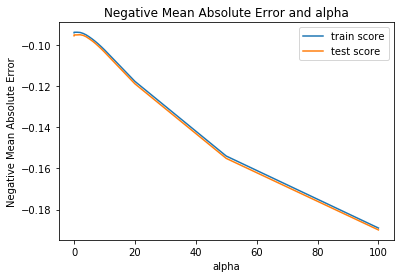

In [1711]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1712]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.30880203,  0.75378538,  0.219634  ,  0.3355158 ,  0.83629371,
       -0.3335992 , -0.08348437, -0.07077375, -0.12060904, -0.22886356,
        0.10369269])

In [1713]:
y_train_pred = ridge.predict(X_train)
print("Training r2",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Test r2",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
from sklearn.metrics import mean_squared_error
print ('RMSE is: ',mean_squared_error(y_test, y_test_pred))

Training r2 0.8766892231678127
Test r2 0.8751910914710694
RMSE is:  0.02229495806218392


<b><font color='red'>[Observation] - </font></b> <br>
    1) We can see that after using Ridge regularisation, train and test r2 score are almost similar. Which implies that there is no in training data set overfitting.  

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

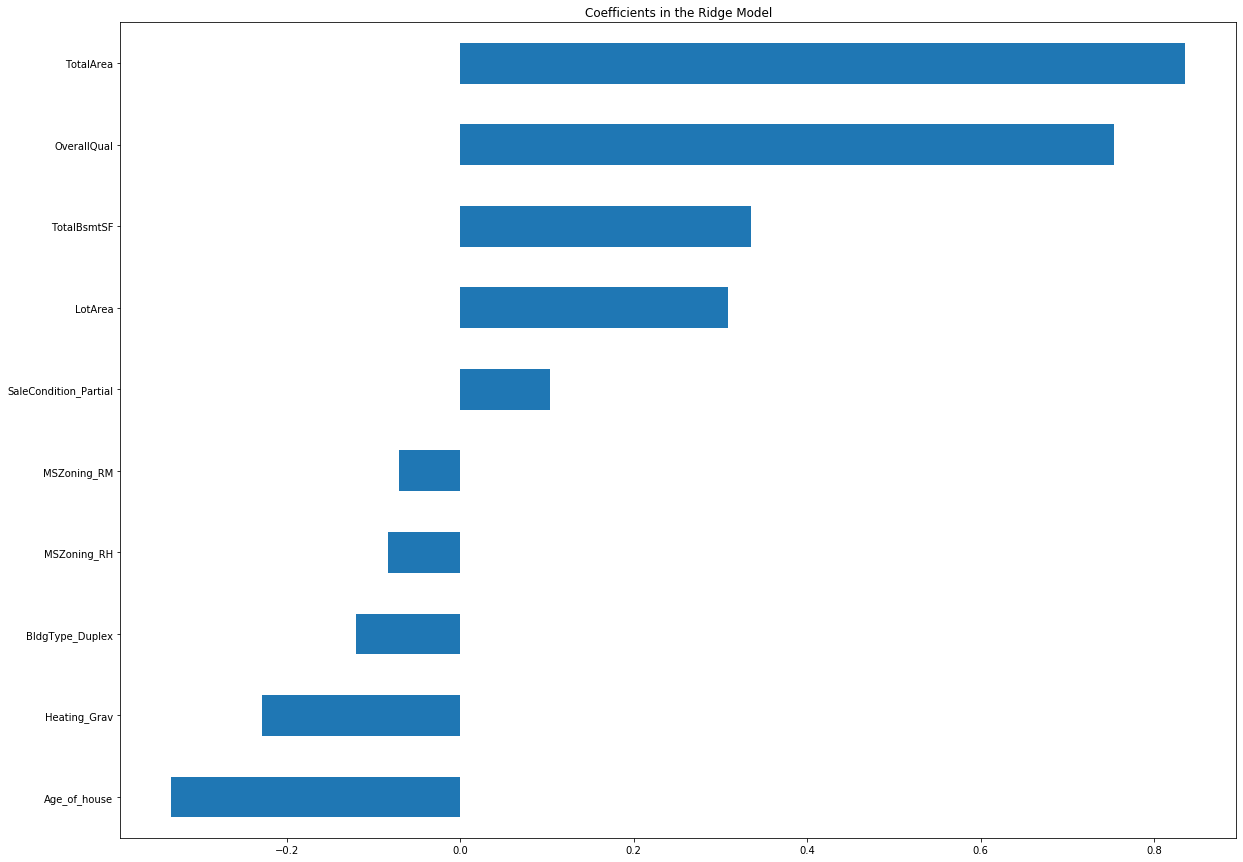

In [1714]:
coef = pd.Series(ridge.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(6),coef.sort_values().tail(4)])
plt.figure(figsize=(20,15))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

# Lasso

In [1715]:
lasso = Lasso()
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01,10,100,1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01, 10, 100,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1716]:
print(model_cv.best_params_)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

{'alpha': 5e-05}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003400,0.000800,0.001001,0.000032,5e-05,{'alpha': 5e-05},-0.093519,-0.095711,-0.097209,-0.104829,...,-0.095516,0.005973,1,-0.095045,-0.093392,-0.093129,-0.091647,-0.097090,-0.094061,0.001859
1,0.003184,0.000421,0.001394,0.000485,0.0001,{'alpha': 0.0001},-0.093481,-0.095720,-0.097268,-0.104833,...,-0.095517,0.005989,2,-0.095076,-0.093398,-0.093131,-0.091661,-0.097097,-0.094072,0.001861
2,0.002609,0.000476,0.001411,0.000499,0.001,{'alpha': 0.001},-0.093571,-0.096925,-0.100400,-0.105073,...,-0.096466,0.006329,3,-0.096423,-0.094317,-0.094006,-0.092879,-0.098449,-0.095215,0.001982
3,0.002010,0.000021,0.001190,0.000406,0.008,{'alpha': 0.008},-0.103151,-0.122088,-0.123179,-0.117203,...,-0.113486,0.009219,4,-0.114122,-0.112026,-0.112046,-0.109953,-0.114285,-0.112487,0.001596
4,0.003583,0.000484,0.001211,0.000395,0.01,{'alpha': 0.01},-0.107288,-0.130157,-0.130682,-0.122441,...,-0.119467,0.010569,5,-0.120002,-0.117960,-0.117851,-0.116524,-0.120046,-0.118477,0.001361


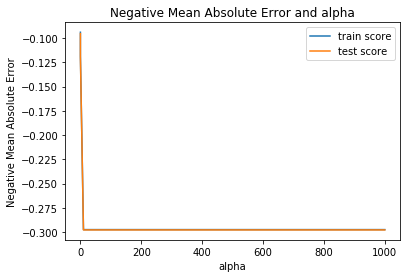

{'alpha': 5e-05}


In [1717]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()
print(model_cv.best_params_)

In [1718]:
alpha =0.00005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=5e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1719]:
lasso.coef_

array([ 0.35579317,  0.7856988 ,  0.21725133,  0.33538034,  0.87674334,
       -0.33309172, -0.09116695, -0.06285081, -0.12271191, -0.29966584,
        0.09406406])

In [1720]:
housing.shape

(1425, 207)

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

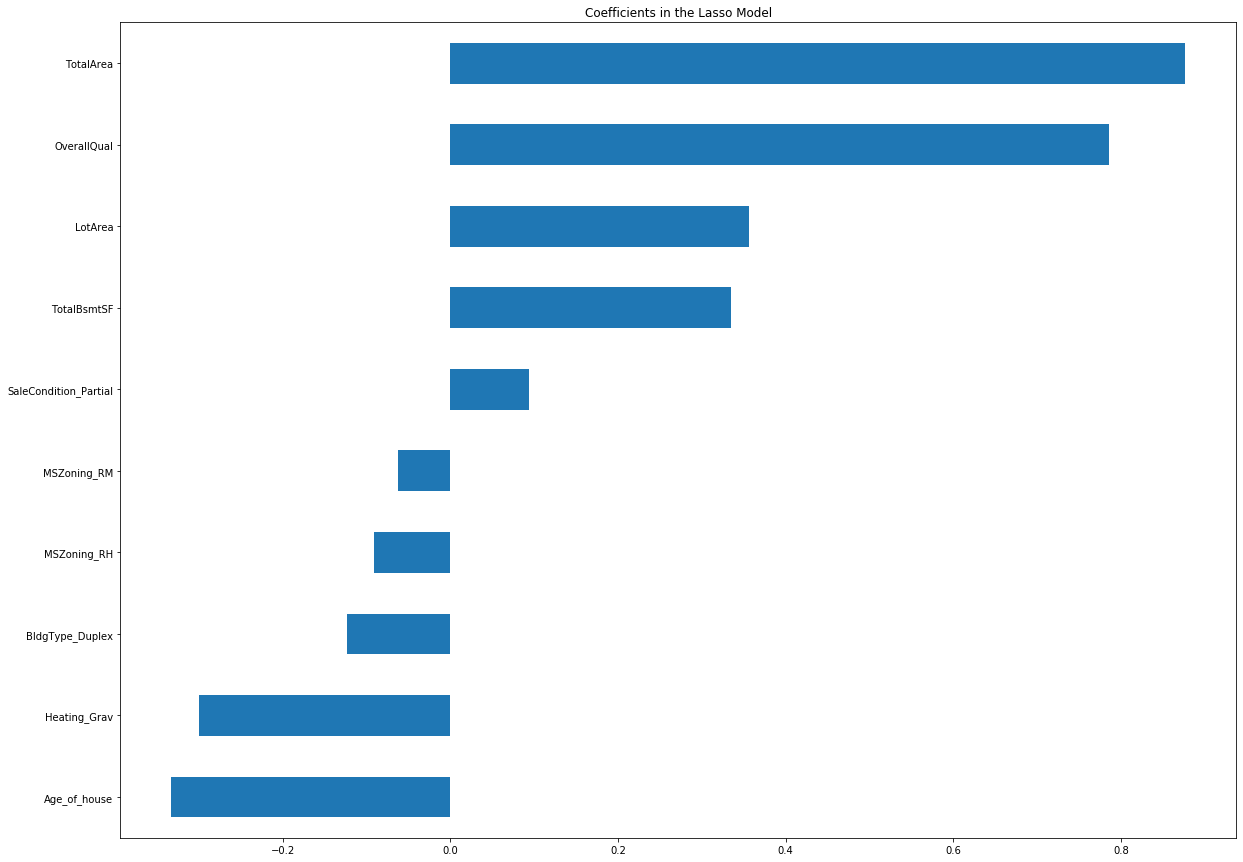

In [1721]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(6),coef.sort_values().tail(4)])
plt.figure(figsize=(20,15))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [1722]:
y_train_pred = lasso.predict(X_train)
print("Training r2",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print("Test r2",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
from sklearn.metrics import mean_squared_error
print ('RMSE is: ',mean_squared_error(y_test, y_test_pred))

Training r2 0.8779457519088832
Test r2 0.8779753338289832
RMSE is:  0.021797601204117525


<b><font color='red'>[Observation] - </font></b> <br>
    1) We can see that after Lasso using regularisation, train and test r2 score are almost similar. Which implies that overfitting has bee reduced. 

<b><font color='red'>Result- </font></b> <br>
    
    1) Total area (area of the house) which comprises of 1stFlrSF, 2ndFlrSF, GrLivArea have highest positive correlation with target variable SalePrice. So higher the Area better the price.
    2) Higher the basement area better are the chances of getting better price.
    3) OverAll quality and condition of the house have positive relation with SalePrice.
    4) Age of the house is one of the deciding factor while buying the house, hence  newer the house greater the price.
    5) Gravity furnace heating may lead to lower price
    6) So our final model has 10 features and has r2 of 88%